# Understanding Descriptive Statistics

Import the necessary libraries here:

In [46]:
# Libraries
import random as random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
import cufflinks as cf
import plotly.express as px
cf.go_offline()

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [48]:
def result(n):
    dado = [1,2,3,4,5,6]
    results = []
    for i in range(n):
        results.append(random.choice(dado))
    return results
data = result(10)
df = pd.DataFrame(data, columns=['results']).reset_index()
df.rename(columns={'index':'roll'}, inplace=True)
df['roll'] = df['roll'].apply(lambda x:x+1)
df

,roll,results
0,1,2
1,2,3
2,3,5
3,4,6
4,5,1
5,6,5
6,7,3
7,8,6
8,9,3
9,10,6


#### 2.- Plot the results sorted by value.

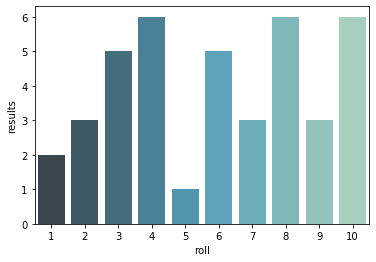

In [49]:
# your code here
sns.barplot(x='roll', y='results', data=df, palette='GnBu_d')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [50]:
freq_distr = df.groupby('results').size().reset_index()
freq_distr.rename(columns={'results':'dice_face', 0:'frequency'},inplace=True)
freq_distr

,dice_face,frequency
0,1,1
1,2,1
2,3,3
3,5,2
4,6,3


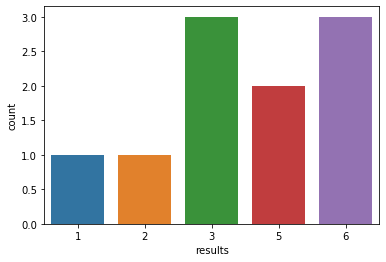

In [51]:
# your code here
sns.countplot(df['results'])

In [52]:
"""
your comments here
In the second one, the scale doesnt go to 10, as the are some values that are repeated in each try, so they can be grouped by the dice_face
"""

'\nyour comments here\nIn the second one, the scale doesnt go to 10, as the are some values that are repeated in each try, so they can be grouped by the dice_face\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [53]:
# your code here
def mean(df):
    return sum(df['results'])/10

mean(df)

4.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [54]:
def frequency_distr(x):
    unique, counts = np.unique(x, return_counts=True)
    freq_distr = dict(zip(unique, counts))
    return freq_distr
freq_distr = frequency_distr(data)
freq_distr

{1: 1, 2: 1, 3: 3, 5: 2, 6: 3}

In [55]:
mean = sum(freq_distr.values())/len(freq_distr)
mean

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [56]:
# your code here
def median(df):
    rolls = df['results'].sort_values().to_list()
    if len(rolls)%2 == 0:
        return (rolls[len(rolls)//2]+rolls[(len(rolls)//2)-1])/2
    else:
        return rolls[(len(rolls)//2)]
median(df)

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [90]:
# your code here
df.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

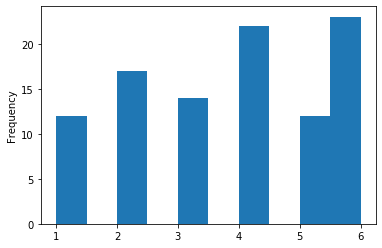

In [58]:
# your code here
df = pd.read_csv('../data/roll_the_dice_hundred.csv')

df['value'].plot.hist()

In [ ]:
"""
In this graph we can see the frequency of each dice face, seeing that number 4 and 6 are the most repeated ones,
and 1 and 5 the less repeated.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [59]:
# your code here
def mean(df):
    return sum(df['value'])/len(df['value'])

mean(df)

3.74

#### 3.- Now, calculate the frequency distribution.


In [60]:
# your code here
df['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

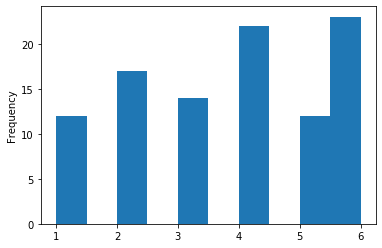

In [62]:
# your code here
df['value'].plot.hist()

In [ ]:
"""
your comments here
The mean is 3.74 as 4 and 6 are the most repeated values, as explained before
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

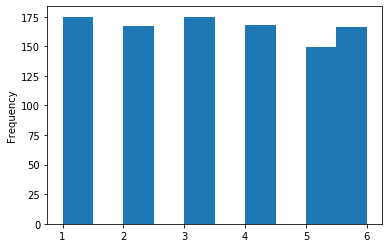

In [64]:
# your code here
df = pd.read_csv('../data/roll_the_dice_thousand.csv')

df['value'].plot.hist()

In [ ]:
"""
The distribution of values have changed as the sample of the distribution is bigger in this data set 
(from 100, to 1000), meaning that we hace more values to compare 
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

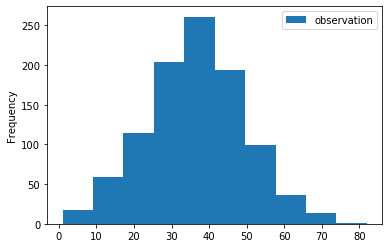

In [75]:
# your code here
df = pd.read_csv('../data/ages_population.csv')

df.plot.hist()

"""
the mean will be from 35 to 40 and the standard deviation 
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [79]:
# your code here
df['observation'].mean()

36.56

In [80]:
df['observation'].std()

12.81649962597677

In [81]:
"""
i said between 35-40 and it is 36.6, so its on point
"""

'\ni said between 35-40 and it is 36.6, so its on point\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

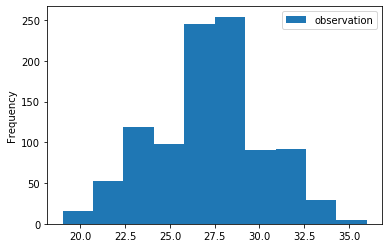

In [84]:
# your code here
df = pd.read_csv('../data/ages_population2.csv')

df.plot.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
we are only looking to values from 20 to 35 years old
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [86]:
df['observation'].mean()

27.155

In [85]:
# your code here
df['observation'].std()

2.9698139326891835

In [ ]:
"""
the mean is less as the interval of people observed is smaller
the is less diferences as the sample of observed is less disperse
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

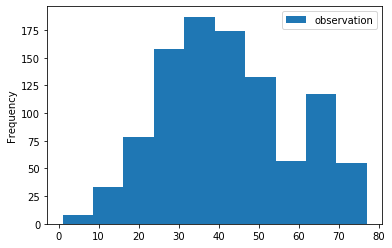

In [87]:
# your code here
df = pd.read_csv('../data/ages_population3.csv')

df.plot.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [88]:
# your code here
df['observation'].mean()

41.989

In [89]:
df['observation'].std()

16.14470595986593

In [ ]:
"""
people in this distribution is older than the sample observed in step 1, so the mean is bigger
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""